### Here the data preparation is not done so the accuracy of the model is not great. The data can be pre-preprocessed to get a better accuracy.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Downloads/Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#To get a description of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Check if the null values are present
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Plotting Few Plots

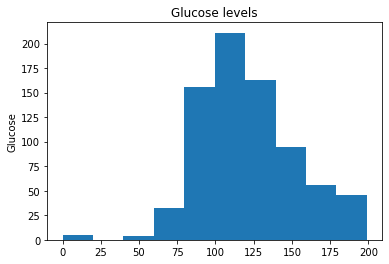

In [19]:
plt.hist(df['Glucose']);
plt.title("Glucose levels");
plt.ylabel("Glucose");

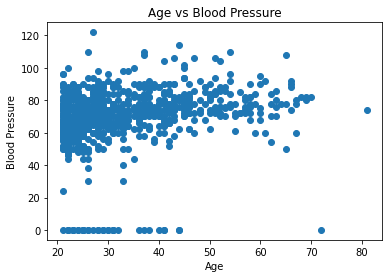

In [24]:
plt.scatter(y=df['BloodPressure'],x=df['Age']);
plt.title("Age vs Blood Pressure");
plt.xlabel("Age");
plt.ylabel("Blood Pressure");

### Splitting, training, testing and evaluating our model

In [26]:
#Splitting data into train and test dataset.
from sklearn.model_selection import train_test_split
X=df.drop("Outcome",axis=1)
y=df['Outcome']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2) #The testing data is 20% of the entire data.

In [28]:
#Intitalizing the Random Forest classification model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [29]:
#fitting and testing our model on train data.
model.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

In [30]:
#testing the model on test data.
model.score(X_test,y_test)

0.7727272727272727

In [31]:
#Evaluating the model.
from sklearn.metrics import accuracy_score
y_preds=model.predict(X_test)
accuracy_score(y_test,y_preds)

0.7727272727272727

In [32]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_preds)
conf_matrix

array([[90, 20],
       [15, 29]], dtype=int64)

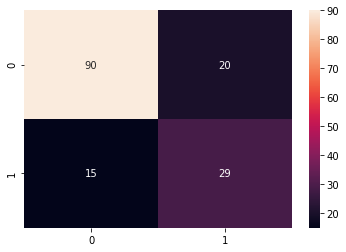

In [34]:
import seaborn as sns 
sns.heatmap(conf_matrix,annot=True);